In [1]:
import pandas as pd
import numpy as np
import gzip
import json
import re
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# genre_df = pd.DataFrame(load_data("../dataset/goodreads_book_genres_initial.json.gz"))
genres_df = pd.read_json("../dataset/goodreads_book_genres_initial.json", lines=True)

In [3]:
genres_df.head()

,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}


In [4]:
def load_data(file_name, genres_df, head = 5000):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            if (d["image_url"] != "https://s.gr-assets.com/assets/nophoto/book/111x148-bcc042a9c91a29c1d680899eff700a03.png") \
            and (d["description"] != "") and (float(d["average_rating"]) > 0) and (d["language_code"] in ["en", "eng", "en-US", "en-CA", "eng-GB"]):
                genre_list_idx = genres_df[genres_df["book_id"] == int(d["book_id"])]["genres"].index[0]
                if len(genres_df[genres_df["book_id"] == int(d["book_id"])]["genres"][genre_list_idx]) > 0:
                    count += 1
                    data.append(d)
            
            # break if reaches the 100th line
            if (head is not None) and (count >= head):
                break
    return data

In [5]:
book = load_data(os.path.join("../dataset/", 'goodreads_books.json.gz'), genres_df)
len(book)

5000

In [6]:
book_df = pd.DataFrame(book)
print(book_df.shape)
book_df.head()

(5000, 29)


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ..."
1,0842379428,566,[],US,eng,"[{'count': '6393', 'name': 'to-read'}, {'count...",,false,4.26,B000FCKCJC,...,,,,https://www.goodreads.com/book/show/89376.Heaven,https://images.gr-assets.com/books/1406508230m...,89376,7345,86257,Heaven,Heaven
2,0590417010,193,[],US,eng,"[{'count': '450', 'name': 'to-read'}, {'count'...",,false,4.43,B017RORXNI,...,9,,1995,https://www.goodreads.com/book/show/89378.Dog_...,https://images.gr-assets.com/books/1360057676m...,89378,1331,86259,Dog Heaven,Dog Heaven
3,1400041694,44,[],US,en-US,"[{'count': '362', 'name': 'to-read'}, {'count'...",,false,3.75,B002OTKEP6,...,,,,https://www.goodreads.com/book/show/6158967-cr...,https://images.gr-assets.com/books/1320556043m...,6158967,338,6338156,Crude World: The Violent Twilight of Oil,Crude World: The Violent Twilight of Oil
4,,1,[],US,eng,"[{'count': '8', 'name': 'to-read'}, {'count': ...",,false,3.83,,...,11,,1887,https://www.goodreads.com/book/show/16037549-v...,https://images.gr-assets.com/books/1348176637m...,16037549,3,5212748,Vision of Sir Launfal and Other Poems,Vision of Sir Launfal and Other Poems


In [7]:
book_df["image_url"].value_counts()

https://images.gr-assets.com/books/1304100136m/7327624.jpg     1
https://images.gr-assets.com/books/1394373707m/19515156.jpg    1
https://images.gr-assets.com/books/1448064784m/27868372.jpg    1
https://images.gr-assets.com/books/1347298269m/16001811.jpg    1
https://images.gr-assets.com/books/1435204351m/25792108.jpg    1
                                                              ..
https://images.gr-assets.com/books/1493872377m/31934392.jpg    1
https://images.gr-assets.com/books/1476862772m/31934391.jpg    1
https://images.gr-assets.com/books/1475847058m/31934395.jpg    1
https://images.gr-assets.com/books/1369153579m/15810898.jpg    1
https://images.gr-assets.com/books/1445369653m/27241742.jpg    1
Name: image_url, Length: 5000, dtype: int64

In [8]:
book_df.isna().sum()

isbn                    0
text_reviews_count      0
series                  0
country_code            0
language_code           0
popular_shelves         0
asin                    0
is_ebook                0
average_rating          0
kindle_asin             0
similar_books           0
description             0
format                  0
link                    0
authors                 0
publisher               0
num_pages               0
publication_day         0
isbn13                  0
publication_month       0
edition_information     0
publication_year        0
url                     0
image_url               0
book_id                 0
ratings_count           0
work_id                 0
title                   0
title_without_series    0
dtype: int64

In [9]:
! mkdir -p ../dataset/images/

In [10]:
def download_image(row):
    name = row["book_id"]
    ! wget -O ../dataset/images/{name} -q {row["image_url"]}

In [ ]:
book_df[["image_url", "book_id"]].apply(download_image, axis = 1) # uncomment to download

In [9]:
genres_df["book_id"] = genres_df["book_id"].astype('str')

In [10]:
pd.merge(book_df, genres_df, on="book_id")

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series,genres
0,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,Book Club Edition,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,8948723,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...","{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
1,0842379428,566,[],US,eng,"[{'count': '6393', 'name': 'to-read'}, {'count...",,false,4.26,B000FCKCJC,...,,,https://www.goodreads.com/book/show/89376.Heaven,https://images.gr-assets.com/books/1406508230m...,89376,7345,86257,Heaven,Heaven,{'non-fiction': 163}
2,0590417010,193,[],US,eng,"[{'count': '450', 'name': 'to-read'}, {'count'...",,false,4.43,B017RORXNI,...,,1995,https://www.goodreads.com/book/show/89378.Dog_...,https://images.gr-assets.com/books/1360057676m...,89378,1331,86259,Dog Heaven,Dog Heaven,"{'children': 109, 'fiction': 13, 'non-fiction'..."
3,1400041694,44,[],US,en-US,"[{'count': '362', 'name': 'to-read'}, {'count'...",,false,3.75,B002OTKEP6,...,,,https://www.goodreads.com/book/show/6158967-cr...,https://images.gr-assets.com/books/1320556043m...,6158967,338,6338156,Crude World: The Violent Twilight of Oil,Crude World: The Violent Twilight of Oil,"{'non-fiction': 37, 'history, historical ficti..."
4,,1,[],US,eng,"[{'count': '8', 'name': 'to-read'}, {'count': ...",,false,3.83,,...,,1887,https://www.goodreads.com/book/show/16037549-v...,https://images.gr-assets.com/books/1348176637m...,16037549,3,5212748,Vision of Sir Launfal and Other Poems,Vision of Sir Launfal and Other Poems,{'poetry': 3}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1475233639,5,[309734],US,en-US,"[{'count': '7520', 'name': 'to-read'}, {'count...",,false,4.41,B0069YVY0G,...,,2012,https://www.goodreads.com/book/show/16135247-b...,https://images.gr-assets.com/books/1352316541m...,16135247,31,18236513,"Blood Rites (The Grey Wolves, #2)","Blood Rites (The Grey Wolves, #2)","{'fantasy, paranormal': 377, 'young-adult': 19..."
4996,0739323601,3,[],US,eng,"[{'count': '25', 'name': 'to-read'}, {'count':...",,false,4.38,,...,,2005,https://www.goodreads.com/book/show/454384.The...,https://images.gr-assets.com/books/1320537918m...,454384,39,442970,The Collected Bowdrie Dramatizations: Volume 1,The Collected Bowdrie Dramatizations: Volume 1,"{'fiction': 1, 'history, historical fiction, b..."
4997,0141980508,6,[],US,eng,"[{'count': '70', 'name': 'to-read'}, {'count':...",,false,4.17,,...,,,https://www.goodreads.com/book/show/29429839-i...,https://images.gr-assets.com/books/1469406807m...,29429839,37,49694311,Islam: The Essentials,Islam: The Essentials,"{'non-fiction': 5, 'history, historical fictio..."
4998,,1,[875989],US,eng,"[{'count': '1918', 'name': 'to-read'}, {'count...",,true,4.32,B00J1XLWKY,...,1,2015,https://www.goodreads.com/book/show/28951403-h...,https://images.gr-assets.com/books/1454834500m...,28951403,5,40445248,Human universe,Human universe,"{'non-fiction': 128, 'history, historical fict..."


In [11]:
genres_df.isna().sum()

book_id    0
genres     0
dtype: int64

In [12]:
genres_df["book_id"]

0           5333265
1           1333909
2           7327624
3           6066819
4            287140
             ...   
2360650     3084038
2360651    26168430
2360652     2342551
2360653    22017381
2360654    11419866
Name: book_id, Length: 2360655, dtype: object

In [13]:
genre_labels_df = pd.DataFrame(list(genres_df["genres"]))

In [14]:
genre_labels_df["book_id"] = genres_df["book_id"]

In [16]:
genre_labels_df_reduced["book_id"]

0        7327624
1          89376
2          89378
3        6158967
4       16037549
          ...   
4995    16135247
4996      454384
4997    29429839
4998    28951403
4999    27241742
Name: book_id, Length: 5000, dtype: object

In [31]:
# def change_label_to_binary(val):
#     if str(val) == "nan":
#         return 0
#     else:
#         if float(val) > 0:
#             return 1
#         else:
#             return 0

def change_label_to_binary(row):
    """
    Set category label to 1 for only the one with max no of votes
    """
    category_idx = row.argmax()
    #print(row.index[category_idx])
    return row.index[category_idx]

In [32]:
genre_labels_df.columns

Index(['history, historical fiction, biography', 'fiction',
       'fantasy, paranormal', 'mystery, thriller, crime', 'poetry', 'romance',
       'non-fiction', 'children', 'young-adult', 'comics, graphic', 'book_id'],
      dtype='object')

In [33]:
genre_labels_df["category"] = genre_labels_df[['history, historical fiction, biography', 'fiction',\
       'fantasy, paranormal', 'mystery, thriller, crime', 'poetry', 'romance',\
       'non-fiction', 'children', 'young-adult', 'comics, graphic']].apply(lambda row: change_label_to_binary(row), axis = 1)


In [37]:
genre_labels_df.head()

,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic",book_id,category
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5333265,"history, historical fiction, biography"
1,5.0,219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1333909,fiction
2,NaN,8.0,31.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,7327624,"fantasy, paranormal"
3,NaN,555.0,NaN,10.0,NaN,23.0,NaN,NaN,NaN,NaN,6066819,fiction
4,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,287140,non-fiction


In [38]:
genre_labels_df_reduced = pd.merge(book_df, genre_labels_df, on = "book_id")
print(genre_labels_df_reduced.shape)
genre_labels_df_reduced.head()

(5000, 40)


,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic",category
0,,7,[189911],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,false,4.03,,...,8.0,31.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,"fantasy, paranormal"
1,0842379428,566,[],US,eng,"[{'count': '6393', 'name': 'to-read'}, {'count...",,false,4.26,B000FCKCJC,...,NaN,NaN,NaN,NaN,NaN,163.0,NaN,NaN,NaN,non-fiction
2,0590417010,193,[],US,eng,"[{'count': '450', 'name': 'to-read'}, {'count'...",,false,4.43,B017RORXNI,...,13.0,NaN,NaN,NaN,NaN,2.0,109.0,1.0,NaN,children
3,1400041694,44,[],US,en-US,"[{'count': '362', 'name': 'to-read'}, {'count'...",,false,3.75,B002OTKEP6,...,1.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,non-fiction
4,,1,[],US,eng,"[{'count': '8', 'name': 'to-read'}, {'count': ...",,false,3.83,,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,poetry


In [39]:
genre_labels_df_reduced[genre_labels_df.columns]

,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic",book_id,category
0,NaN,8.0,31.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,7327624,"fantasy, paranormal"
1,NaN,NaN,NaN,NaN,NaN,NaN,163.0,NaN,NaN,NaN,89376,non-fiction
2,NaN,13.0,NaN,NaN,NaN,NaN,2.0,109.0,1.0,NaN,89378,children
3,13.0,1.0,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,6158967,non-fiction
4,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,16037549,poetry
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NaN,13.0,377.0,NaN,NaN,176.0,NaN,NaN,196.0,NaN,16135247,"fantasy, paranormal"
4996,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,454384,"history, historical fiction, biography"
4997,1.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,29429839,non-fiction
4998,5.0,1.0,NaN,NaN,NaN,NaN,128.0,NaN,NaN,NaN,28951403,non-fiction


In [22]:
genre_labels_df_reduced["book_id"]

0        7327624
1          89376
2          89378
3        6158967
4       16037549
          ...   
4995    16135247
4996      454384
4997    29429839
4998    28951403
4999    27241742
Name: book_id, Length: 5000, dtype: object

In [43]:
genre_labels_df_reduced.category.value_counts()

fiction                                   1083
romance                                   1016
fantasy, paranormal                        869
mystery, thriller, crime                   553
non-fiction                                453
history, historical fiction, biography     332
young-adult                                220
comics, graphic                            204
children                                   192
poetry                                      78
Name: category, dtype: int64

In [44]:
def get_binary_cat(x):
    if x in ["fiction", "romance", "fantasy, paranormal", "young-adult"]:
        return "fiction"
    else:
        return "non-fiction"

In [45]:
genre_labels_df_reduced["binary_category"] = genre_labels_df_reduced["category"].apply(lambda x: get_binary_cat(x))

In [46]:
genre_labels_df_reduced["binary_category"].value_counts()

fiction        3188
non-fiction    1812
Name: binary_category, dtype: int64

In [23]:
genre_labels_df_reduced[["book_id"]].to_csv("../dataset/book_id.csv", index=False)

In [40]:
genre_labels_df_reduced.to_csv("../dataset/books_with_genres.csv", index=False)

In [41]:
genre_labels_df_reduced["description"]

0       Omnibus book club edition containing the Ladie...
1       What is Heaven really going to be like? What w...
2       In Newbery Medalist Cynthia Rylant's classic b...
3       A stunning and revealing examination of oil's ...
4       Number 30 in a series of literary pamphlets pu...
                              ...                        
4995    With the challenge complete and the corrupt Al...
4996    Follow Chick Bowdrie's adventure in these clas...
4997    The essential introduction to Islam by a leadi...
4998    Human life is a staggeringly strange thing. On...
4999    Criminal attorney Heath Thorpe thought he knew...
Name: description, Length: 5000, dtype: object

In [24]:
plt.imread("../dataset/images/12001743").shape

(158, 98, 3)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

/home/a/ajayago/.conda/envs/cs5260/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

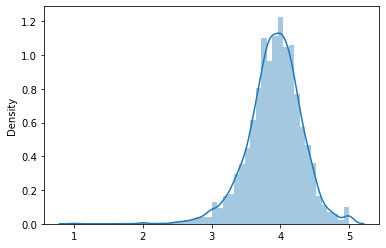

In [27]:
sns.distplot(x = genre_labels_df_reduced["average_rating"])

In [42]:
genre_labels_df_reduced.category.value_counts()

fiction                                   1083
romance                                   1016
fantasy, paranormal                        869
mystery, thriller, crime                   553
non-fiction                                453
history, historical fiction, biography     332
young-adult                                220
comics, graphic                            204
children                                   192
poetry                                      78
Name: category, dtype: int64

In [24]:
df = pd.read_csv("../dataset/books_with_genres.csv")
df.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic"
0,NaN,7,['189911'],US,eng,"[{'count': '58', 'name': 'to-read'}, {'count':...",B00071IKUY,False,4.03,NaN,...,0,1,1,1,1,0,0,0,0,0
1,0842379428,566,[],US,eng,"[{'count': '6393', 'name': 'to-read'}, {'count...",NaN,False,4.26,B000FCKCJC,...,0,0,0,0,0,0,1,0,0,0
2,0590417010,193,[],US,eng,"[{'count': '450', 'name': 'to-read'}, {'count'...",NaN,False,4.43,B017RORXNI,...,0,1,0,0,0,0,1,1,1,0
3,1400041694,44,[],US,en-US,"[{'count': '362', 'name': 'to-read'}, {'count'...",NaN,False,3.75,B002OTKEP6,...,1,1,0,0,0,0,1,0,0,0
4,NaN,1,[],US,eng,"[{'count': '8', 'name': 'to-read'}, {'count': ...",NaN,False,3.83,NaN,...,0,0,0,0,1,0,0,0,0,0


In [25]:
df["book_id"] = genre_labels_df_reduced["book_id"]
df["book_id"].head()

0     7327624
1       89376
2       89378
3     6158967
4    16037549
Name: book_id, dtype: object

In [32]:
df.iloc[4999]["title"]

'Conflict of Interest'

In [33]:
genre_labels_df_reduced.iloc[4999]["title"]

'Conflict of Interest'

In [34]:
df.shape

(5000, 39)

In [35]:
df.to_csv("../dataset/books_with_genres.csv", index=False)